<a href="https://colab.research.google.com/github/fsajad9/Power_flow/blob/main/armijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
from numpy import linalg as la
import time

In [ ]:
def func(x):
    return (1-x[0])**2+10*(x[1]-x[0]**2)**2

In [ ]:
def line_search(c,ep,x0,alpha,beta):
    loss=[]  
    xx=[]
    xx1=[]
    tr=[]
    c=c
    gr=[]
    ite=0

    ep=ep
    x0=x0
    beta=beta
    alpha0=alpha
    start_time=time.time()
    while ep>.001:
        f0=func(x0)
        loss.append(f0)
        g0 = nd.Gradient(func)(x0) 
        gr.append(np.linalg.norm(g0))
        xx.append(x0[0])
        xx1.append(x0[1])
       # alpha=alpha0
        x1=x0-alpha*g0
        f1=func(x1)
        while f1>f0-c*alpha*la.norm(g0)**2:
            alpha=beta*alpha
            x1=x0-alpha*g0
            f1=func(x1)
        x0=x1
        g0=nd.Gradient(func)(x0)
        ep=la.norm(g0)
        end_time_loop=time.time()    
        tr.append(end_time_loop-start_time)
        ite +=1
        alpha*=2
    end_time=time.time()
    return xx,xx1,ite,loss

In [ ]:
x0=[-1,2]
alpha=1
c=.05
ep=.3
beta=.86
x_lin,y_lin,ite_lin,los_lin=line_search(c,ep,x0,alpha,beta)

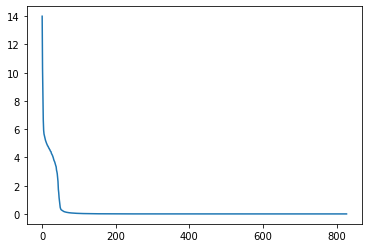

In [ ]:
plt.plot(los_lin)

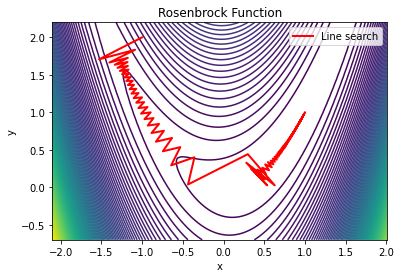

In [ ]:


plt.plot(x_lin,y_lin,'r-',linewidth=2.0,label="Line search")
s = 0.1   # Try s=1, 0.25, 0.1, or 0.05
X = np.linspace(-2.1,2.01,100)   #Could use linspace instead if dividing
Y = np.linspace(-.7,2.2,100)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 10.*(Y-X*X)**2
plt.contour(X,Y,Z,130)

plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock Function")
plt.legend()


plt.show()